In [1]:
import itertools
import numpy as np
from numpy import pi
from qiskit import Aer, QuantumCircuit
from qiskit.compiler import transpile
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks

In [25]:
def random_quantum_state():
    z0 = np.random.randn(2) + 1j * np.random.randn(2)
    z0 = z0 / np.linalg.norm(z0)
    return z0

# Create random states
ψ = random_quantum_state()
ϕ = random_quantum_state()
# ψ = np.array([1,0])
# φ = np.array([0,1])

In [26]:
# Parameters
N = 3
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = [0,0], [pi,0]
th_v1, th_v2 = [0,0], [0,0]
fi_v1, fi_v2 = [0,0], [0,0]
lam_v1, lam_v2 = [0,0],  [0,0]

params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))
# Initialize Discriminator
discriminator = StateDiscriminativeQuantumNeuralNetworks(ψ, ϕ)

# Calculate cost function
discriminator.cost_function(params)

CircuitError: "Trying to compose with another QuantumCircuit which has more 'in' edges."

In [27]:
circuit = discriminator.get_n_element_povm( N, th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2)

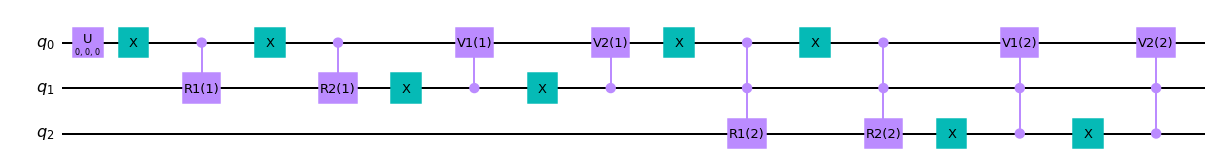

In [28]:
circuit.draw(output='mpl')

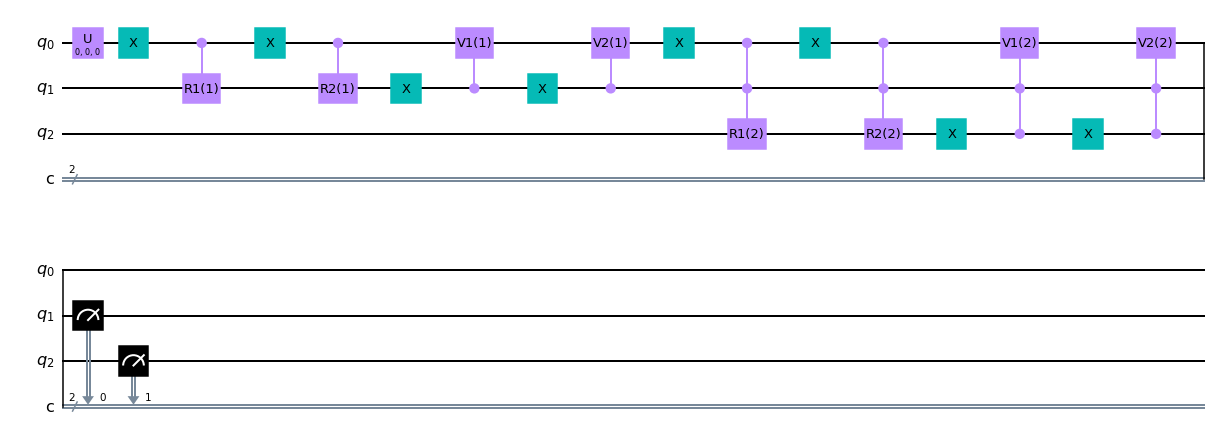

In [29]:
qc1 = QuantumCircuit(N, N-1 )
qc1.compose( circuit, range(N), inplace=True )
qc1.measure(range(1,N) , range(N-1) )
qc1.draw(output='mpl')

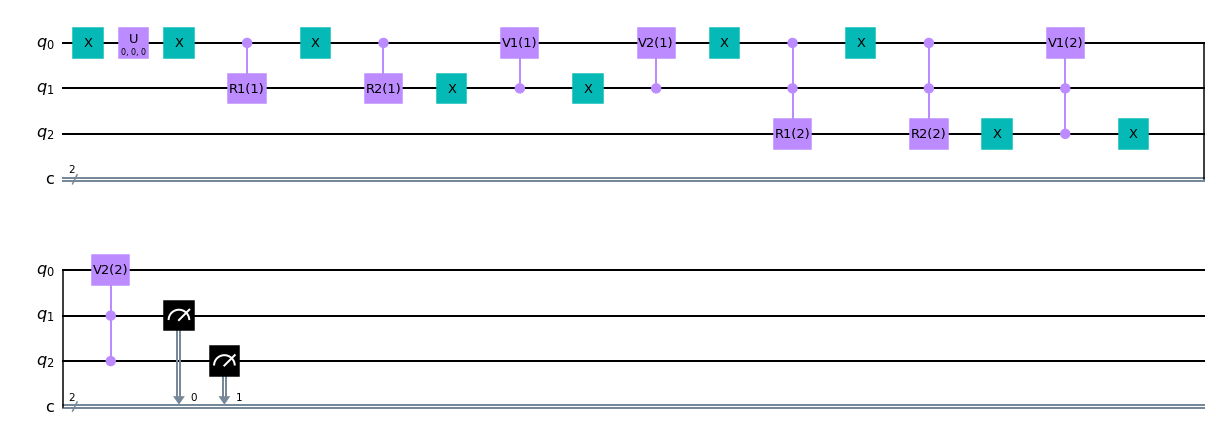

In [19]:
qc2 = QuantumCircuit(N, N-1 )
qc2.x(0)
qc2.compose( circuit, range(N), inplace=True )
qc2.measure(range(1,N) , range(N-1) )
qc2.draw(output='mpl')

In [20]:
backend_sim = Aer.get_backend(discriminator._backend)

In [21]:
qcs = transpile( [qc1,qc2], backend_sim) 

In [22]:
results = backend_sim.run( qcs ).result()

In [23]:
results.get_counts(qc1)

{'00': 1024}

In [24]:
results.get_counts(qc2)

{'01': 1024}

In [ ]:
p_psi_1 = p['01'] 

In [ ]:
p_phi_0 = p['00']

In [ ]:
p_err = .5*p_psi_1 + .5*p_phi_0

In [ ]:
p_inc  = p['10'] + p['11']

In [ ]:
cf = alpha_err*p_err + alpha_inc*p_inc

In [ ]:
    def cost_function(self, params) -> float:
        """Cost function.

        Parameters
        -------
        params
            A flat list of all the parameters.

        Returns
        -------
        The cost.
        """

        p = self.decompose_parameters(params)
        if not p:
            self._logger.error('Cannot calculate the cost function with these parameters.')
            return 0

        # Create the first circuit using get_n_element_povm
        circuit = self.get_n_element_povm(
            p['n'] + 1, p['theta_u'], p['phi_u'], p['lambda_u'], p['theta_1'], p['theta_2'], p['theta_v1'],
            p['theta_v2'], p['phi_v1'], p['phi_v2'], p['lambda_v1'], p['lambda_v2'])
        
        n = p['n'] + 1

        # Create the psi circuit
        qc_psi = QuantumCircuit(n, n-1)
        qc_psi.initialize(self._psi, 0)
        qc_psi.barrier()
        qc_psi.compose(circuit, range(n), inplace=True)
        qc_psi.measure( range(1,n) , range(n) )

        # Create the phi circuit
        qc_phi = QuantumCircuit(n, n-1)
        qc_phi.initialize(self._phi, 0)
        qc_phi.barrier()
        qc_phi.compose(circuit, range(n), inplace=True)
        qc_psi.measure( range(1,n) , range(n) )

        # Create the backend
        backend_sim = Aer.get_backend(self._backend)

        # Transpile and run
        qc_psi = transpile(qc_psi, backend_sim)
        results_psi = backend_sim.run(qc_psi, self._shots)
        qc_phi = transpile(qc_phi, backend_sim)
        results_phi = backend_sim.run(qc_phi, self._shots)

        # Count
        counts_psi = results_psi.result().get_counts()
        counts_phi = results_phi.result().get_counts()

        # Get prob
        p_1_psi = counts_psi.get('01', 0) / self._shots
        p_0_phi = counts_phi.get('00', 0) / self._shots
        p_err   = .5 * p_1_psi + .5 * p_0_phi
        
        p_i_psi = counts_psi.get('11', 0) / self._shots + counts_psi.get('10', 0) / self._shots
        p_i_phi = counts_phi.get('11', 0) / self._shots + counts_phi.get('10', 0) / self._shots
        p_inc   = .5 * p_i_psi + .5 * p_i_phi

        return 0.5 * p_1_psi + 0.5 * p_0_phi

In [ ]:
state0 = np.array([ 1, 0 ])
state1 0 np.array([ cos(theta), sen(theta) ])